# **쉽고 빠르게 알아보는 재정데이터 시각화** 💸📊  

👥moneymoney해도money

## **목차**
### **1. 개요**
**1-1. 분석 환경**
  
**1-2. 분석 목적**
### **2. 크롤링을 활용한 키워드 분석**  
### **3. 데이터 가공 및 분석 준비**
  **3-1. 데이터 전처리**
  
  **3-2. 사용자 정의 그래프 함수 및 팔레트 생성**

### **4. 전체 분야 분석**  
**4-1. 연도에 따른 분야별 국회확정금액 추이**   

**4-2. 전체 분야별 국회확정금액 비율**

### **5. 분야별 세부 사업 분석**
**5-1. 교육분야**  

**5-2. 국방분야**  

**5-3. 산업·중소기업및에너지분야**  

**5-4. 교통분야**  

**5-4. 보건분야**


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cach/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
import rpy2
%load_ext rpy2.ipython

## **1. 개요**

### 1-1. 분석 환경

분석 환경은 Colab환경에서 R을 사용하여 진행하였습니다.  

KoNLP 패키지 설치 오류로 인해 워드 클라우드로 시각화하는 부분은 파이썬을 사용하였습니다.  


### 1-2. 분석 목적

사람들이 관심이 있어하면서도 실제로 비교적 높은 중요도를 갖는 분야에서 예산을 어떻게 사용하는지 보다 쉽게 이해할 수 있도록 시각화를 진행하였습니다.

개인과 기업 모두 다양한 목적으로 사용되는 **네이버 블로그**는 개인적 관심사와 사회적 관심사를 모두 파악할 수 있을 것이라고 생각되어  
사람들의 관심사를 파악하기 위한 수단으로 네이버 블로그 크롤링을 진행하였습니다.

또한, 제목에는 **핵심 단어**를 사용하여 내용을 함축적으로 담고있는 경우가 많기 때문에 크롤링 내용 중에서도 제목만 가져와서 단어를 추출하였습니다.  

## **2. 크롤링을 활용한 키워드 분석**

In [ ]:
%%R
# 패키지 설치
install.packages("stringr")
install.packages("jsonlite")
install.packages("httr")
install.packages("tidyverse")
install.packages("rvest")
install.packages("dplyr")
install.packages("xml2")
install.packages("memoise")
install.packages("multilinguer")
install.packages("tm")
install.packages("readr")
install.packages("utils")

In [ ]:
%%R
# 패키지 로드
library(stringr)
library(jsonlite)
library(httr)
library(tidyverse)
library(httr)
library(rvest)
library(dplyr)
library(xml2)
library(memoise)
library(multilinguer)
library(tm)
library(readr)
library(utils)

In [ ]:
%%R
#블로그 타이틀 크롤링
blog <- c()
for (i in 1: 300) {
  GET(url = "https://section.blog.naver.com/ajax/SearchList.nhn",
      query = list("countPerPage" = "7",
                   "currentPage" = i,
                   "endDdfadfadfate" = "2020-12.31",
                   "keyword" = "예산집행내역",
                   "orderBy" = "sim",
                   "startDate" = "2020-01-01",
                   "type" = "post"),
      add_headers("referer" = "https://section.blog.naver.com/Search/Post.nh")) %>% httr::content(as = "text") %>% str_remove(pattern = '\\)\\]\\}\',') %>% fromJSON() -> naverBlog
  
  data <- naverBlog$result$searchList
  blog <- bind_rows(blog, data) 
  
  cat(i, "번째 페이지 크롤링 완료\n")
  Sys.sleep(time = 3)
}

In [ ]:
%%R
#데이터 구조 확인 후 타이틀 추출
glimpse(blog)
titles <- blog$noTagTitle

In [ ]:
%%R
#불용어제거
titles <- str_replace_all(titles,"&quot;","")
titles <- str_replace_all(titles,"&#39;","")
titles <- gsub("[[:punct:]]", "", titles)
titles <- gsub("quot", "", titles)

In [ ]:
%%R
#데이터 저장
write.csv(titles,"/content/drive/MyDrive/data/title.csv")

In [ ]:
# 파이썬으로 단어 추출 및 워드클라우드 시각화
import pandas as pd
from konlpy.tag import Okt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [ ]:
word = pd.read_csv("/content/drive/MyDrive/data/title.csv")

In [ ]:
#단어 추출
okt = Okt()
final=[]
for i in range(0,2100):
   list_n=okt.nouns(word[i])
   final=final+list_n

In [ ]:
#글자의 길이가 1이면 버리기
final = [n for n in final if len(n) > 1]

In [ ]:
#단어 갯수 카운트 한 뒤 상위 100개 단어추출
count = Counter(final)
top_100 = count.most_common(100)

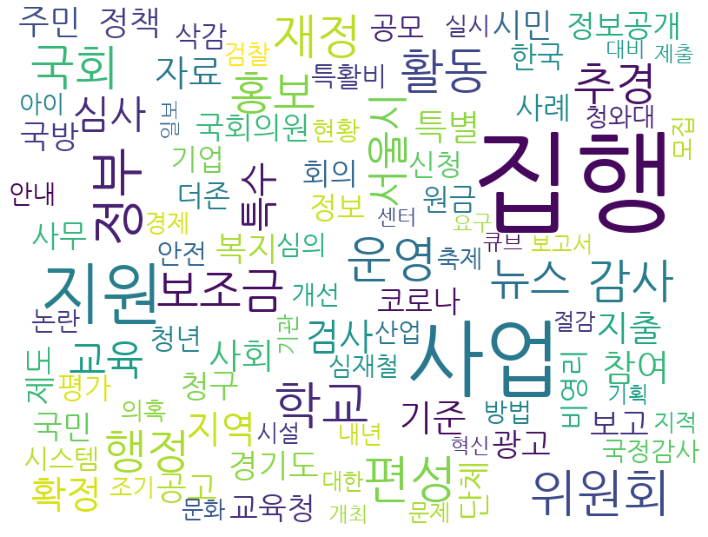

In [ ]:
#워드클라우드 그리기
wordcloud = WordCloud(font_path='NanumGothic.ttf',background_color='white', width=800, height=603,max_font_size=125)
cloud = wordcloud.generate_from_frequencies(dict(top_100))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

✔️ 네이버 블로그에 **'예산집행내역'** 키워드를 크롤링한 후 빈도수가 높은 단어들을 워드클라우드로 시각화한 결과  

   코로나, 학교, 교육, 국방, 기업, 청년 등 **보건, 교육, 국방, 산업(중소기업)**관련 단어들이 많이 추출되었습니다.  

✔️ 이를 통해 사람들이 관심이 많은 네가지 분야를 알게되었고, 세출결산현황이 가장 높은 **교통**분야까지 추가하여 총 다섯개의 분야를 살펴보기로 결정하였습니다.

## **3. 데이터 가공 및 분석 준비**




### 3-1. 데이터 전처리

In [ ]:
%%R
# 패키지 로드
library(readxl)
library(dplyr)
library(ggplot2)
library(ggrepel)
library(RColorBrewer)

In [ ]:
%%R
# 데이터 불러오기
data<- read_xlsx("/content/drive/MyDrive/1-2-2. 세출 지출 세목 예산편성현황(총지출).xlsx")

In [ ]:
%%R
# 사용할 컬럼 추출
data<- data[c(1,5,6,8,15)]
colnames(data)<- c('회계연도','분야명','부문명','단위사업명','국회확정금액')
data$국회확정금액<- as.numeric(data$국회확정금액)
head(data,3)

# A tibble: 3 × 5
  회계연도 분야명        부문명   단위사업명        국회확정금액
  <chr>    <chr>         <chr>    <chr>                    <dbl>
1 2021     일반·지방행정 일반행정 518 진상규명 지원       120000
2 2021     일반·지방행정 일반행정 518 진상규명 지원        39600
3 2021     일반·지방행정 일반행정 518 진상규명 지원         2000


In [ ]:
%%R
# 5개 분야에 해당되는 데이터 추출
data_select1<- data %>% filter(분야명 == "교육" | 분야명 == "교통및물류" | 분야명 == "국방" |
                     분야명 ==  "보건" | 분야명 == "산업·중소기업및에너지") %>%
        filter(회계연도 == "2020" | 회계연도 == "2021")

In [ ]:
%%R
#select_all : 분야별 전체 확정금액 합계 추출 
select_all<- data_select1 %>% 
    group_by(분야명) %>% 
    summarise(sum_value = sum(국회확정금액))  %>%
    mutate(perc = sum_value/sum(sum_value)) %>%
    arrange(perc) %>%
    mutate(labels = scales:: percent(perc)) 

In [ ]:
%%R
# 최근 10년간 데이터 추출
data_select2<- data %>% filter(분야명 == "교육" | 분야명 == "교통및물류" | 분야명 == "국방" |
                     분야명 ==  "보건" | 분야명 == "산업·중소기업및에너지") %>%
        filter(회계연도 != "2007" & 회계연도 != "2008"  & 회계연도 != "2009"  & 회계연도 != "2010")

year_value = data_select2 %>% 
    group_by(회계연도, 분야명)%>% 
    summarise(sum_value = sum(국회확정금액)) %>%
    arrange(desc(분야명))

`summarise()` has grouped output by '회계연도'. You can override using the `.groups` argument.


✔️ 5개의 분야에 대하여 최근 10년 데이터를 사용하기 위해 다음과 같이 전처리를 진행하였습니다.

### 3-2. 사용자 정의 그래프 함수 및 팔레트 생성

In [ ]:
%%R
#분야별 파이 차트 사용자 정의 함수
pie_chart_fun<- function(name, title, palette = "OrRd") {
    
    df<- data_select1 %>% filter(분야명 == name) %>%
      group_by(부문명) %>% 
      summarise(sum_value = sum(국회확정금액))  %>%
      mutate(perc = sum_value/sum(sum_value)) %>%
      arrange(perc) %>%
      mutate(labels = scales:: percent(perc)) 

    ggplot(df, aes(x = "", y = perc, fill = 부문명)) +
        geom_col(color = "white", lwd = 0.5) +
        geom_label(aes(label = labels),
            position = position_stack(vjust = 0.5),
            show.legend = FALSE) +
    guides(fill = guide_legend(title = "부문명")) + 
    labs(x="", y = "", title = title) +
    scale_fill_viridis_d() +
    coord_polar(theta = "y") + 
    scale_fill_manual(values = palette) +
    theme_void()+
    theme(legend.title = element_text(size=15, 
                                      face="bold"),
       legend.text =  element_text(size=12, 
                                      face="bold"),
       title = element_text(size=15, 
                                      face="bold"))
}

In [ ]:
%%R
#분야별 사탕 차트 사용자 정의 함수
point_chart_fun<- function(df, title, x_angle = 25, x_size = 10){
    
 ggplot(df, aes(x=reorder(단위사업명,-sum_value), y=sum_value,color=단위사업명,label=sum_value)) + 
  geom_point(size=5) + 
  geom_segment(aes(x=단위사업명, 
                   xend=단위사업명, 
                   y=0, 
                   yend=sum_value)) + 
  labs(x=" ",
       y=" ", 
       title=title)+ 
  theme_bw()+
  theme(plot.title = element_text(size=15, face = "bold"),
        legend.title = element_text(size=15, 
                                      face="bold"),
        axis.text.x = element_text(size = x_size, angle = x_angle, hjust = 1, face = "bold"),
        axis.text.y= element_text(size=10, face = "bold"), 
        axis.title=element_text(size=15,face = "bold"))+
  geom_text_repel()+
  scale_colour_manual(values=getPalette(colourCount))
}

In [ ]:
%%R
#분야별 바차트 사용자 정의 함수
bar_chart_fun<- function(name, title,palette){
    select<- data_select2 %>% filter(분야명==name)

    colourCount = length(unique(select$회계연도))
    getPalette = colorRampPalette(brewer.pal(8, "Set2"))

    ggplot(select,aes(x=회계연도,y=국회확정금액,group=부문명))+
      geom_col(aes(fill=부문명),position="stack")+
      labs(title = title,
           x = '연도', y = '국회확정금액') +
      theme(axis.title=element_text(size=15),title=element_text(size=15)) +
      scale_fill_manual(values = palette)
}

In [ ]:
%%R
#분야별 사용자 정의 팔레트 생성
all_palette <- c("Light Steel Blue","Gray 90","Dark Sea Green","Light Goldenrod","Sandy Brown")
edu_palette <- c("Light Sky Blue3","Slate Gray 1","Slate Gray3","Slate Gray 2")
army_palette <- c("Dark Sea Green3","Dark Sea Green4","Dark Sea Green1","Dark Sea Green2")
industry_palette <-c("Burlywood 1","Burlywood 2","Light Salmon 1","Light Salmon 2","Orange 1","Chocolate 1","Chocolate 2","Orange 2","Wheat 1","Wheat 2")
traffic_palette <-c("Gray 60","Gray 70","Gray 50","Gray 80","Gray 90")
traffic_palette2 <-c("Gray 60","Gray 80","Gray 70","Gray 50","Gray 90","Gray 100")
health_palette <-c("Light Goldenrod 3","Light Goldenrod 2","Light Goldenrod 1")

#산점도 사용자 정의 팔레트 생성
getPalette = colorRampPalette(brewer.pal(9, "Set2"))
#colourCount = length(unique(head(education_detail,10)$단위사업명)) # education_detail 생성 후 실행

✔️ 반복되는 시각화를 함수로 정의하여 사용하도록 하였고, 팔레트를 각 분야에 맞는 색상으로   지정하였습니다.

## **4. 전체 분야 분석**

### 4-1. 연도에 따른 분야별 국회확정금액 추이

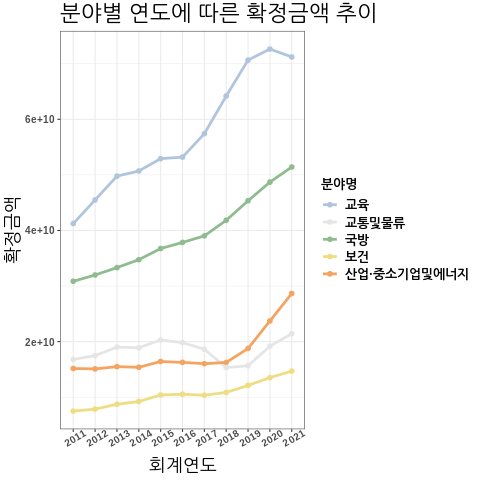

In [ ]:
%%R
# 분야별 연도에 따른 확정금액 추이 시각화
ggplot(year_value, aes(x=회계연도, y = sum_value, group = 분야명, color = 분야명)) + 
  geom_line(size = 1.3) + 
    labs(x="회계연도",
         y="확정금액", 
       title="분야별 연도에 따른 확정금액 추이")+ 
theme_bw()+
geom_point(size=2) +
scale_color_manual(values=all_palette)+
theme(plot.title = element_text(size=22),
      legend.title = element_text(size=13, 
                                      face="bold"),
      legend.text = element_text(size = 13, face = "bold"),
      ,axis.text.x= element_text(size=10,angle = 30, face = "bold"),
       axis.text.y= element_text(size=10, face = "bold"),
        axis.title=element_text(size=18)) 

✔️ 국민들이 관심있어 하는 5개 분야의 최근 10년간 국회확정금액 추이를 시각화 해본 결과, 몇몇 분야에서 일시적으로 감소하는 경향이 있었지만 대체적으로 상승추세를 보이고 있음을 알 수 있었습니다.

### 4-2. 전체 분야별 국회확정금액 비율

R[write to console]: Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



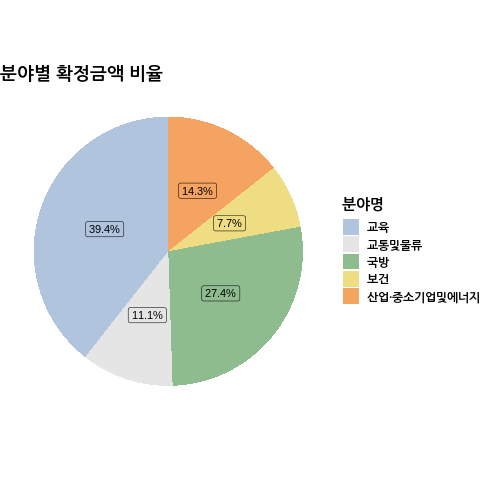

In [ ]:
%%R
#분야별 전체 확정 금액 파이차트 시각화
ggplot(select_all, aes(x = "", y = perc, fill = 분야명)) +
        geom_col() +  
        geom_label(aes(label = labels),
            position = position_stack(vjust = 0.5),
            show.legend = FALSE) +
    guides(fill = guide_legend(title = "분야명")) + 
    labs(x="", y = "", title = "분야별 확정금액 비율") +
    scale_fill_viridis_d() +
    coord_polar(theta = "y") + 
    scale_fill_manual(values = all_palette) +
    theme_void()+
    theme(legend.title = element_text(size=15, 
                                      face="bold"),
       legend.text =  element_text(size=12, 
                                      face="bold"),
       title = element_text(size=15, 
                                      face="bold"))

✔️ 크롤링 기간을 바탕으로 최근 2년동안 확정금액 평균 비율을 계산하여 파이차트로 나타내보았습니다.  

✔️ 차트를 보면 국회확정금액이 교육-국방-산업·중소기업및에너지-교통및물류-보건 순으로 높은 것을 확인할 수 있었습니다.


## **5. 분야별 세부 사업 분석**

### 5-1. 교육 분야

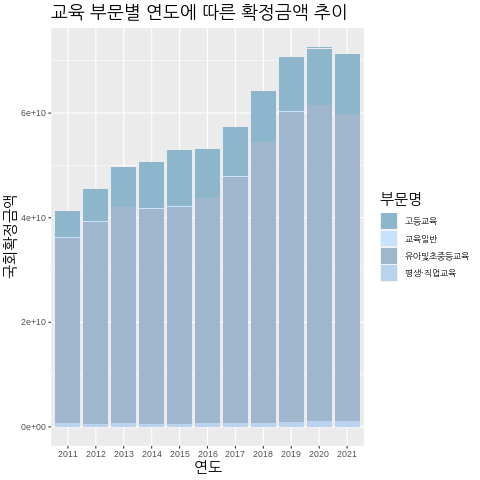

In [ ]:
%%R
bar_chart_fun("교육", "교육 부문별 연도에 따른 확정금액 추이",edu_palette)

✔️ 확정금액이 가장 높았던 교육분야부터 연도에 따른 부문별 확정 금액을 시각화한 결과, 유아및초중등교육부분에 가장 큰 금액을 배정한 것을 알 수 있었습니다.

R[write to console]: Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



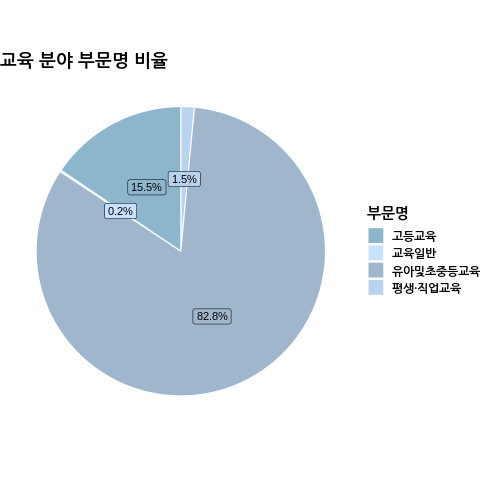

In [ ]:
%%R
pie_chart_fun("교육", "교육 분야 부문명 비율",edu_palette)

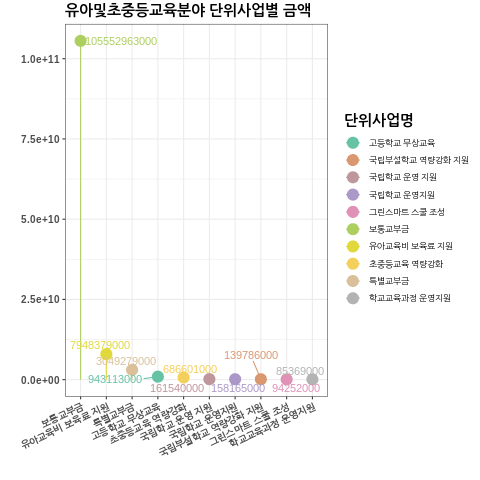

In [ ]:
%%R
education_detail<- data_select1 %>% filter(분야명 == "교육") %>%
    filter(부문명 == "유아및초중등교육") %>%
    group_by(단위사업명) %>% 
    summarise(sum_value = sum(국회확정금액))  %>%
    arrange(desc(sum_value))
    
point_chart_fun(head(education_detail,10),"유아및초중등교육분야 단위사업별 금액")

✔️ 교육분야에서 최근 몇년간 부문별 확정금액의 
합계와 비율을 구한 뒤 파이차트로 시각화 하고, 
가장 큰 부문의 단위사업별 확정금액을 
사탕차트로 시각화하여 나타내보았습니다.   

✔️유아및초중등교육중에서도 보통교부금사업에 
가장 큰 금액을 배정한 것을 알 수 있었습니다.

### 5-2. 국방 분야

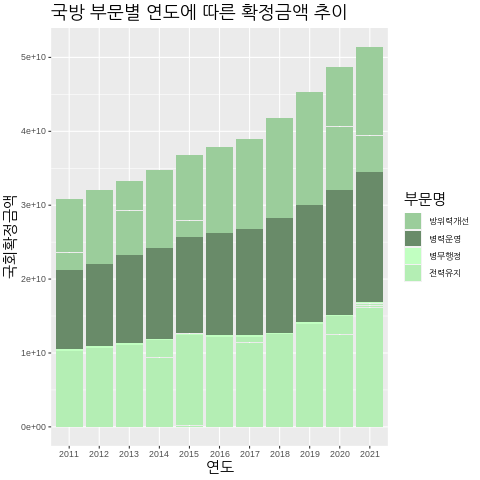

In [ ]:
%%R
bar_chart_fun("국방", "국방 부문별 연도에 따른 확정금액 추이", army_palette)

✔️ 두번째로 높았던 국방분야의 연도에 따른 부문별 확정 금액을 시각화한 결과,
병력운영부문에 가장 큰 금액을 배정한 것을 알 수 있었습니다.

R[write to console]: Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



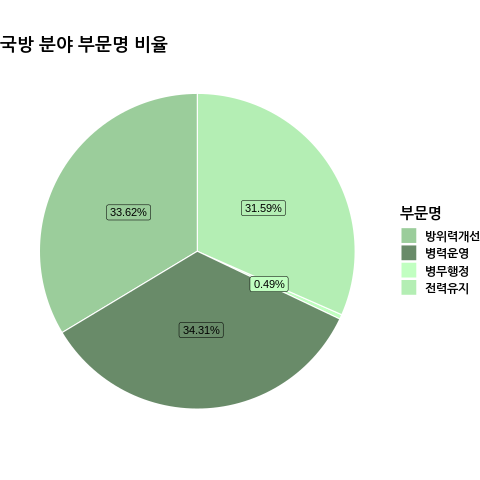

In [ ]:
%%R
pie_chart_fun("국방", "국방 분야 부문명 비율",army_palette)

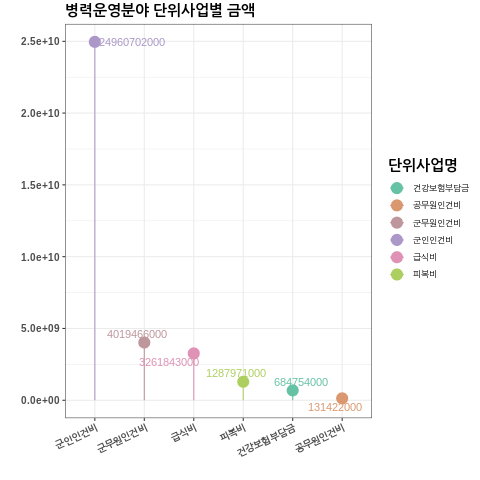

In [ ]:
%%R
army_detail<- data_select1 %>% filter(분야명 == "국방") %>%
    filter(부문명 == "병력운영") %>%
    group_by(단위사업명) %>% 
    summarise(sum_value = sum(국회확정금액))  %>%
    arrange(desc(sum_value))

point_chart_fun(army_detail, "병력운영분야 단위사업별 금액", x_size = 10)

✔️ 국방분야에서 최근 몇년간 부문별 확정금액의 
합계와 비율을 구한 뒤 파이차트로 시각화 하고, 
가장 큰 부문의 단위사업별 확정금액을 
사탕차트로 시각화하여 나타내보았습니다.   

✔️ 병력운영중에서도 군인인건비사업에 
가장 큰 금액을 배정한 것을 알 수 있었습니다.


### 5-3. 산업·중소기업및에너지 분야

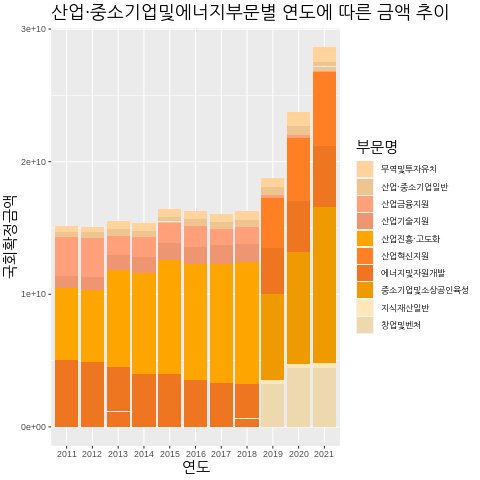

In [ ]:
%%R
bar_chart_fun("산업·중소기업및에너지", "산업·중소기업및에너지부문별 연도에 따른 금액 추이", industry_palette)

✔️ 세번째로 높았던 산업·중소기업및에너지분야의 연도에 따른 부문별 확정 금액을 시각화한 결과,
18년도까지는 산업진흥·고도화 부문이 가장 높았지만
최근 3년간은 중소기업및소상공인육성부문에 배정한 금액이 가장 큰 것을 알 수 있었습니다.

R[write to console]: Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



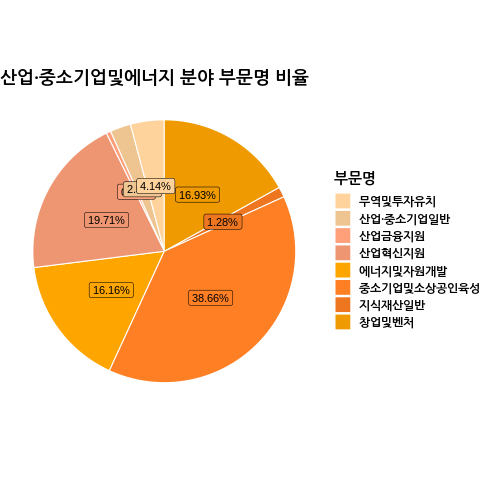

In [ ]:
%%R
pie_chart_fun("산업·중소기업및에너지", "산업·중소기업및에너지 분야 부문명 비율",industry_palette)

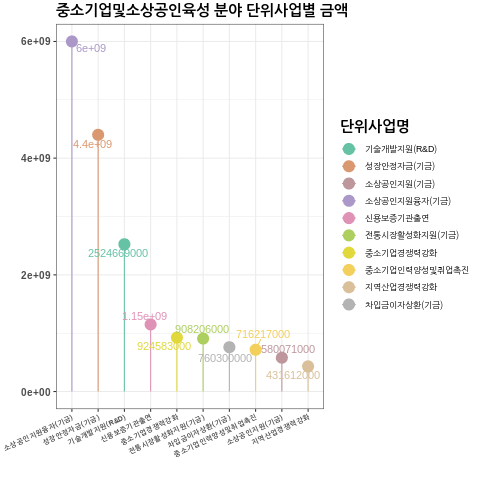

In [ ]:
%%R
industry_detail<- data_select1 %>% filter(분야명 == "산업·중소기업및에너지") %>%
    filter(부문명 == "중소기업및소상공인육성") %>%
    group_by(단위사업명) %>% 
    summarise(sum_value = sum(국회확정금액))  %>%
    arrange(desc(sum_value))

point_chart_fun(head(industry_detail,10), "중소기업및소상공인육성 분야 단위사업별 금액", x_size = 7)

✔️ 산업·중소기업및에너지에서 최근 몇년간 
부문별 확정금액의 합계와 비율을 구한 뒤 
파이차트로 시각화 하고, 
가장 큰 부문의 단위사업별 확정금액을 
사탕차트로 시각화하여 나타내보았습니다.   

✔️ 중소기업및소상공인육성중에서도 
소상공인지원융자(기금)사업에 
가장 큰 금액을 배정한 것을 알 수 있었습니다.

### 5-4. 교통 분야

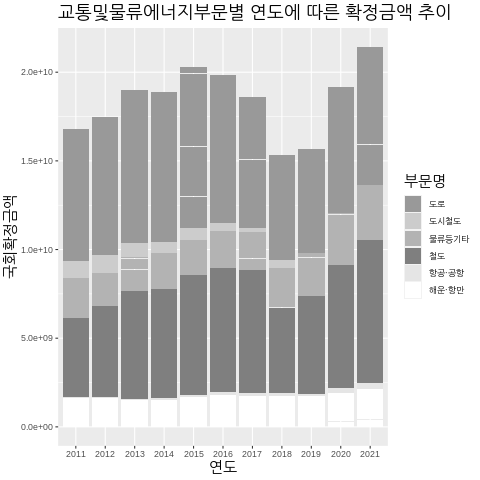

In [ ]:
%%R
bar_chart_fun("교통및물류", "교통및물류에너지부문별 연도에 따른 확정금액 추이", traffic_palette2)

✔️ 네번째로 높았던 교통및물류분야의 연도에 따른 부문별 확정 금액을 시각화한 결과,
철도부문에 가장 큰 금액을 배정한 것을 알 수 있었습니다.

R[write to console]: Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



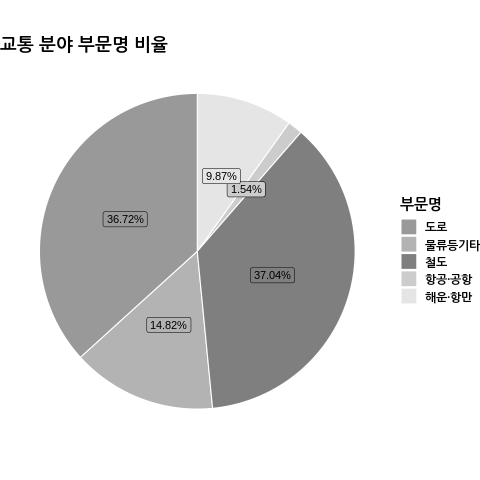

In [ ]:
%%R
pie_chart_fun("교통및물류", "교통 분야 부문명 비율",traffic_palette)

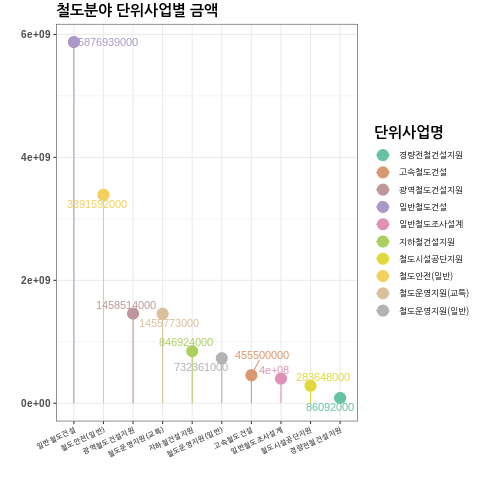

In [ ]:
%%R
traffic_detail<- data_select1 %>% filter(분야명 == "교통및물류") %>%
    filter(부문명 == "철도") %>%
    group_by(단위사업명) %>% 
    summarise(sum_value = sum(국회확정금액))  %>%
    arrange(desc(sum_value))

point_chart_fun(head(traffic_detail,10), "철도분야 단위사업별 금액", x_size = 7) 

✔️ 교통및물류분야에서 최근 몇년간 
부문별 확정금액의 합계와 비율을 구한 뒤 
파이차트로 시각화 하고, 
가장 큰 부문의 단위사업별 확정금액을 
사탕차트로 시각화하여 나타내보았습니다.  

✔️ 철도중에서도 일반철도건설사업에 
가장 큰 금액을 배정한 것을 알 수 있었습니다.


### 5-5. 보건 분야

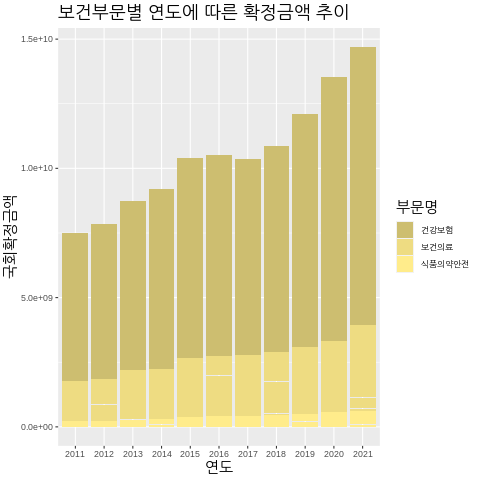

In [ ]:
%%R
bar_chart_fun("보건", "보건부문별 연도에 따른 확정금액 추이", health_palette)

✔️ 다섯번째로 높았던 보건분야의 연도에 따른 부문별 확정 금액을 시각화한 결과,
건강보험부문에 가장 큰 금액을 배정한 것을 알 수 있었습니다.


R[write to console]: Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



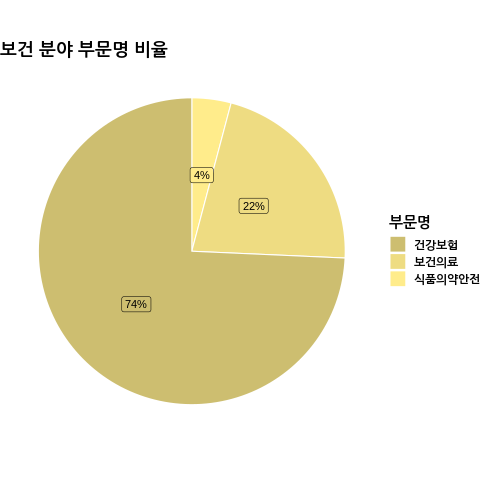

In [ ]:
%%R
pie_chart_fun("보건", "보건 분야 부문명 비율",health_palette)

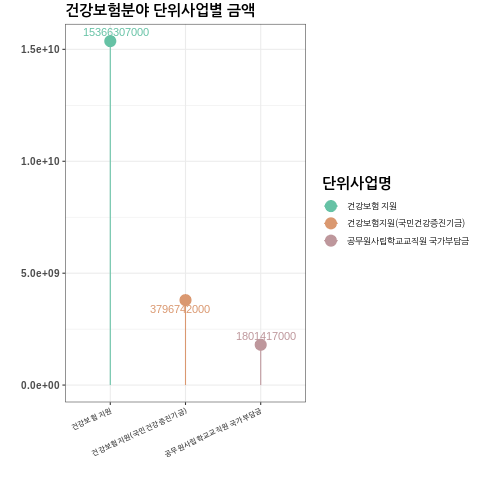

In [ ]:
%%R
health_detail<- data_select1 %>% filter(분야명 == "보건") %>%
    filter(부문명 == "건강보험") %>%
    group_by(단위사업명) %>% 
    summarise(sum_value = sum(국회확정금액))  %>%
    arrange(desc(sum_value))

point_chart_fun(head(health_detail,10), "건강보험분야 단위사업별 금액", x_size = 7)

✔️ 보건분야에서 최근 몇년간 부문별 확정금액의 
합계와 비율을 구한 뒤 파이차트로 시각화 하고, 
가장 큰 부문의 단위사업별 확정금액을 
사탕차트로 시각화하여 나타내보았습니다.   

✔️ 건강보험중에서도 건강보험지원사업에 
가장 큰 금액을 배정한 것을 알 수 있었습니다.